In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data_path = '../mydata/data/datafile/uci-glass.data'
column_path = '../mydata/data//datafile/uci-glass.names'
with open(column_path, encoding='utf-8') as f:
    column_names = [name.strip() for name in f.readlines()]

glass = pd.read_csv(data_path, names=column_names, index_col='id')
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type
id                                                                     
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1

In [2]:
print(len(glass))
print(glass.shape)

214
(214, 10)


결과를 보면 10개의 변수로 이루어진 레코드가 214개 있다는 사실을 알 수 있음

판다스 데이터프레임에서 하나의 컬럼을 선택하면 `Series`라는 객체가 나온다.

In [4]:
print(type(glass['glass_type']))
glass['glass_type']

<class 'pandas.core.series.Series'>


id
1      1
2      1
3      1
4      1
5      1
      ..
210    7
211    7
212    7
213    7
214    7
Name: glass_type, Length: 214, dtype: int64

이산형 변수, 즉 `categorical`이라는 사실을 알 수 있다. 종류를 확인하기 위해 unique를 사용한다. 마치 sql의 `group-by`같은 느낌

In [6]:
glass['glass_type'].unique()

array([1, 2, 3, 5, 6, 7])

각 카테고리에 대한 빈도수도 구할 수 있다

In [8]:
vc = glass['glass_type'].value_counts()
vc

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

윈도우용 유리 1, 2, 3을 0으로, 그 외에는 household로 표시해보자

In [9]:
glass['household'] = glass['glass_type'].map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type  \
id                                                                        
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1   
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1   
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1   
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1   
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1   

    household  
id             
1           0  
2           0  
3           0  
4           0  
5           0

In [10]:
print(type(glass['household'] == 1))
glass['household'] == 1

<class 'pandas.core.series.Series'>


id
1      False
2      False
3      False
4      False
5      False
       ...  
210     True
211     True
212     True
213     True
214     True
Name: household, Length: 214, dtype: bool

이를 이용해 윈도우용 유리와 household 유리를 구분해서 저장할 수 있다

In [15]:
household_glass = glass[glass['household'] == 1]
window_glass = glass[glass['household'] == 0]
print(f'#household glass = {len(household_glass)}')
print(f'#window glass    = {len(window_glass)}')

household_glass.head()

#household glass = 51
#window glass    = 163


ri     na    mg    al     si     k     ca   ba   fe  glass_type  \
id                                                                          
164  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.2  0.0           5   
165  1.51915  12.73  1.85  1.86  72.69  0.60  10.09  0.0  0.0           5   
166  1.52171  11.56  1.88  1.56  72.86  0.47  11.41  0.0  0.0           5   
167  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.0  0.0           5   
168  1.51969  12.64  0.00  1.65  73.75  0.38  11.53  0.0  0.0           5   

     household  
id              
164          1  
165          1  
166          1  
167          1  
168          1

알루미늄 al과 household의 관계를 탐색해보자.

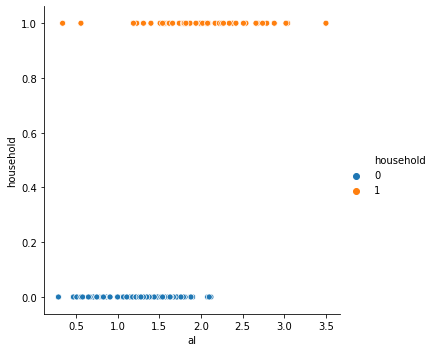

In [16]:
p = sns.relplot(x='al', y='household', hue='household', kind='scatter', data=glass)

보기가 좋지 않다. 히스토그램으로 본다. 분포를 그리는 플랏을 사용한다. kde는 `Kernel Density Estimation`이다.

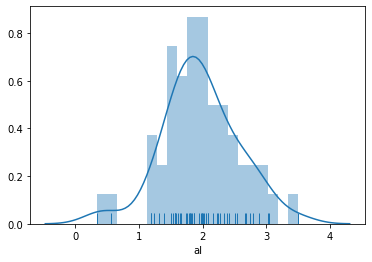

In [17]:
p = sns.distplot(household_glass['al'], hist=True, kde=True, rug=True, bins=20)

대상을 비교하기 위해 중첩해서 그려보자

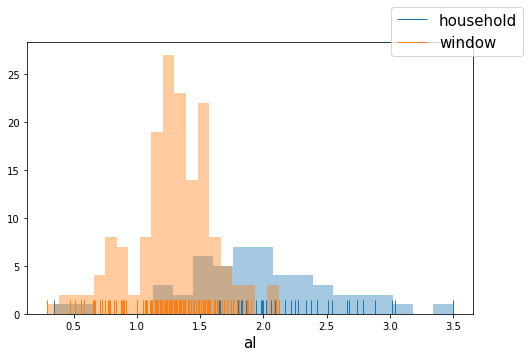

In [18]:
fig = plt.figure(figsize=(8,5))
p = sns.distplot(household_glass['al'], hist=True, kde=False, rug=True, bins=20)
p = sns.distplot(window_glass['al'], hist=True, kde=False, rug=True, bins=20)
fig.legend(labels=['household', 'window'], fontsize=15)
plt.xlabel('al', fontsize=15)
plt.show()
plt.close()

분석해보면 윈도우용 유리의 알루미늄 함유량이 대체적으로 낮은 것을 볼 수 있다. 또한 household는 함유량은 대체적으로 높지만 그 분포가 넓다.

알루미늄을 x로, house홀드를 y로 만들어보자

In [19]:
def make_train_data(input_names=None, data=None):
    if input_names is None:
        input_names = ['al']
    if data is None:
        data = glass
    X = data[input_names].to_numpy()
    y = data['household'].to_numpy()
    return X, y

X, y = make_train_data()

print(f'type X = {type(X)}, shape X = {X.shape}')
print(f'type y = {type(y)}, shape y = {y.shape}')

type X = <class 'numpy.ndarray'>, shape X = (214, 1)
type y = <class 'numpy.ndarray'>, shape y = (214,)


지난 번에 공부한 선형회귀를 사용해보자. LinearRegression은 최소자승법(Least Square)를 사용한다.

intercept   = -0.4858361691974764
coefficient = [0.501177]


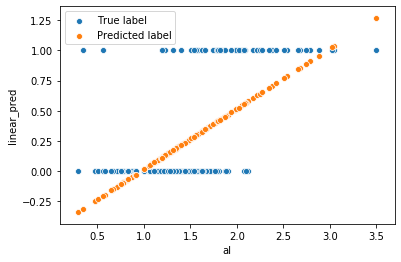

In [20]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_linear = linear_regression.predict(X)

print(f'intercept   = {linear_regression.intercept_}')
print(f'coefficient = {linear_regression.coef_}')

glass['linear_pred'] = y_linear
p = sns.scatterplot(x='al', y='household', data=glass, label='True label')
p = sns.scatterplot(x='al', y='linear_pred', data=glass, label='Predicted label')
plt.show()
plt.close()

`household = -0.486 + 0.501 * al`이라는 식이 도출되었으나 출력이 0 아니면 1이기 때문에 영 좋지 못하다.

이번에는 `logistic regression`으로 household가 1일 확률을 학습해본다. L2 정칙화(regularization)을 사용할 것이다. C = 1/𝜆이다.

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs') # penalty='l2' means L2 regularization
logistic_regression.fit(X, y)
y_logistic = logistic_regression.predict(X)

glass['logistic_pred'] = y_logistic

print(f'intercept   = {logistic_regression.intercept_}')
print(f'coefficient = {logistic_regression.coef_}')

intercept   = [-6.00934605]
coefficient = [[3.11517927]]


In [22]:
y_logistic[:5], y_logistic[-5:]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1]))

In [23]:
y_prob = logistic_regression.predict_proba(X)

print(y_prob.shape, end='\n\n')
print(y_prob[:5])

(214, 2)

[[0.92973651 0.07026349]
 [0.8547934  0.1452066 ]
 [0.77064733 0.22935267]
 [0.87982403 0.12017597]
 [0.89534349 0.10465651]]


In [24]:
glass['logistic_prob'] = y_prob[:,1]
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type  \
id                                                                        
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1   
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1   
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1   
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1   
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1   

    household  linear_pred  logistic_pred  logistic_prob  
id                                                        
1           0     0.065459              0       0.070263  
2           0     0.195765              0       0.145207  
3           0     0.285976              0       0.229353  
4           0     0.160682              0       0.120176  
5           0     0.135623              0       0.104657

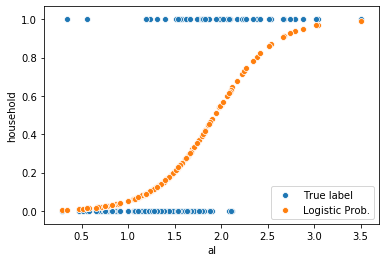

In [25]:
p = sns.scatterplot(x='al', y='household', data=glass, label='True label')
p = sns.scatterplot(x='al', y='logistic_prob', data=glass, label='Logistic Prob.')
plt.xlabel('al')
plt.ylabel('household')
plt.show()
plt.close()

성능 측정을 해보자.

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Confusion matrix')
print(confusion_matrix(y, y_logistic))

print(f'\nPrecision = {precision_score(y, y_logistic)}')
print(f'Recall    = {recall_score(y, y_logistic)}')
print(f'F1        = {f1_score(y, y_logistic)}')
print(f'Accuracy  = {accuracy_score(y, y_logistic)}')

Confusion matrix
[[160   3]
 [ 25  26]]

Precision = 0.896551724137931
Recall    = 0.5098039215686274
F1        = 0.65
Accuracy  = 0.8691588785046729


모든 변수를 사용해서 예측해보자.

In [31]:
X_all, y = make_train_data(input_names=['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'])
print(f'type X = {type(X_all)}, shape X = {X_all.shape}')
print(f'type y = {type(y)}, shape y = {y.shape}')

type X = <class 'numpy.ndarray'>, shape X = (214, 9)
type y = <class 'numpy.ndarray'>, shape y = (214,)


수렴이 잘 되지 않아 max_iter를 100으로 설정한다

In [33]:
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logistic_regression.fit(X_all, y)
y_logistic_all = logistic_regression.predict(X_all)

glass['logistic_pred_all'] = y_logistic_all

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Confusion matrix')
print(confusion_matrix(y, y_logistic_all))

print(f'\nPrecision = {precision_score(y, y_logistic_all)}')
print(f'Recall    = {recall_score(y, y_logistic_all)}')
print(f'F1        = {f1_score(y, y_logistic_all)}')
print(f'Accuracy  = {accuracy_score(y, y_logistic_all)}')

Confusion matrix
[[160   3]
 [  9  42]]

Precision = 0.9333333333333333
Recall    = 0.8235294117647058
F1        = 0.8749999999999999
Accuracy  = 0.9439252336448598


In [35]:
glass.head()

ri     na    mg    al     si     k    ca   ba   fe  glass_type  \
id                                                                        
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1   
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1   
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1   
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1   
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1   

    household  linear_pred  logistic_pred  logistic_prob  logistic_pred_all  
id                                                                           
1           0     0.065459              0       0.070263                  0  
2           0     0.195765              0       0.145207                  0  
3           0     0.285976              0       0.229353                  0  
4           0     0.160682              0       0.120176                  0  
5           0     0.135623              0       0.104657                  0

In [36]:
print(classification_report(y, y_logistic_all))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       163
           1       0.93      0.82      0.87        51

    accuracy                           0.94       214
   macro avg       0.94      0.90      0.92       214
weighted avg       0.94      0.94      0.94       214



In [38]:
# y_logprob_all = logistic_regression.predict_log_proba(X_all)
y_prob_all = logistic_regression.predict_proba(X_all)
print(y_prob_all[:5])

[[0.99655446 0.00344554]
 [0.93636532 0.06363468]
 [0.91745455 0.08254545]
 [0.97550274 0.02449726]
 [0.9668138  0.0331862 ]]


In [39]:
np.where(y == 0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162])

In [40]:
probs = y_prob_all[np.where(y == 0)[0],0]
probs = np.concatenate([probs, y_prob_all[np.where(y == 1)[0],1]])
print(probs.shape)
print(probs[:5])

(214,)
[0.99655446 0.93636532 0.91745455 0.97550274 0.9668138 ]


In [41]:
nll = -np.log(y_prob_all).sum()

print(f'negative log likelihood : {nll}')

negative log likelihood : 781.8099565646716
